In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales_trends_df = pd.read_excel('../data/sales_trends.xlsx')

In [8]:
# Group by date
date_grouped_df = sales_trends_df.groupby(['date']).agg({
    'transaction_id':np.count_nonzero,
    'transaction_qty':np.sum,
    'income':np.sum
}).reset_index()

date_grouped_df.to_excel('../data/sales_trends.xlsx', index=False)

/var/folders/1x/jp3vqcs53vv9kxc9f40hgztc0000gn/T/ipykernel_26386/1316864713.py:2: FutureWarning: The provided callable <function sum at 0x110fb3060> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  date_grouped_df = sales_trends_df.groupby(['date']).agg({


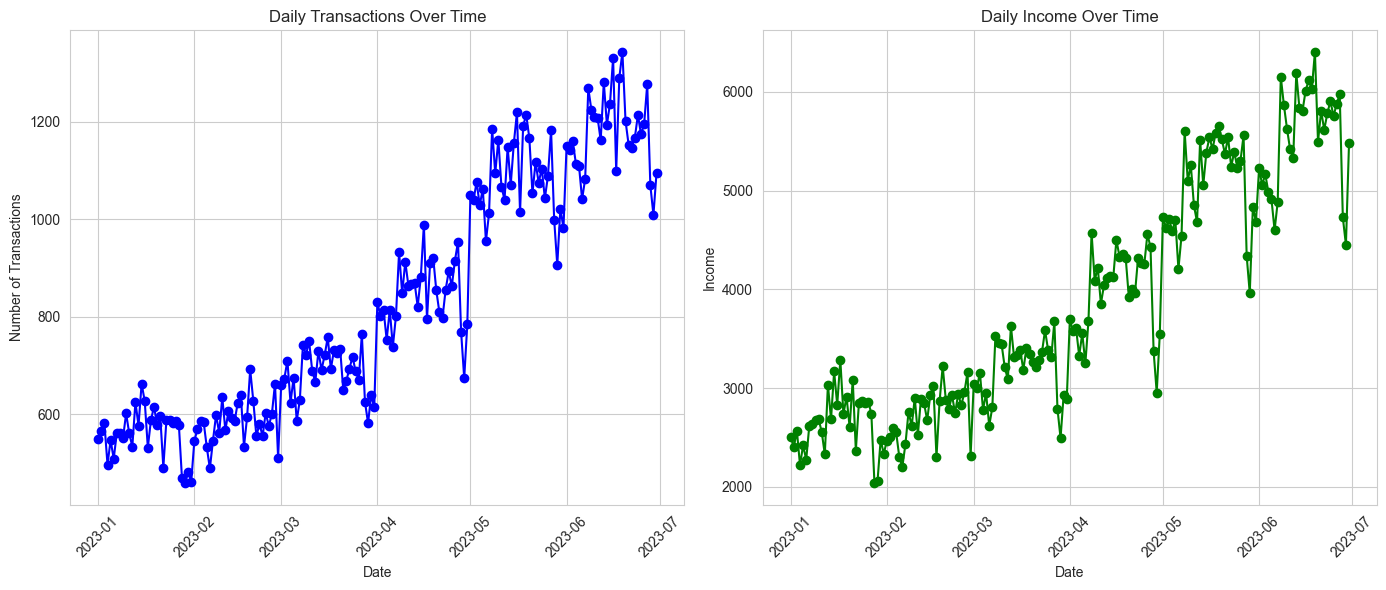

In [5]:
# Set the aesthetics for the plots
sns.set_style("whitegrid")

# Create a figure with specified size
plt.figure(figsize=(14, 6))

# Plotting transactions over time
plt.subplot(1, 2, 1)
plt.plot(date_grouped_df['date'], date_grouped_df['transaction_id'], color='blue', marker='o', linestyle='-')
plt.title('Daily Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)

# Plotting income over time
plt.subplot(1, 2, 2)
plt.plot(date_grouped_df['date'], date_grouped_df['income'], color='green', marker='o', linestyle='-')
plt.title('Daily Income Over Time')
plt.xlabel('Date')
plt.ylabel('Income')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


- Daily Transactions Over Time: Shows the fluctuation in the number of transactions on a daily basis.
- Daily Income Over Time: Illustrates how the daily income varies over the same period.

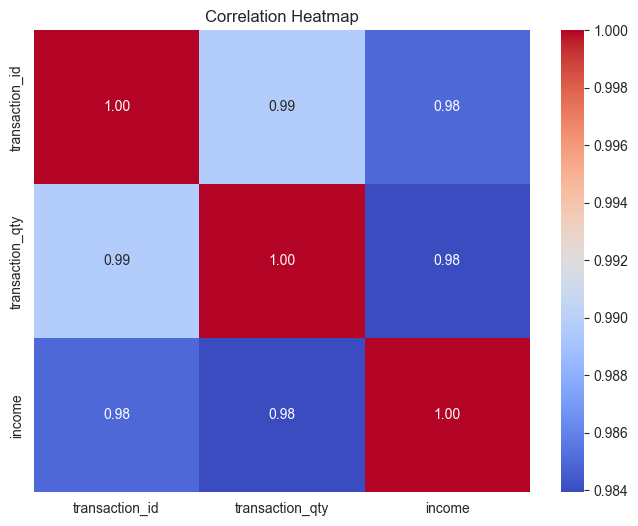

In [6]:
# Compute the correlation matrix for the grouped data
correlation_matrix = date_grouped_df[['transaction_id', 'transaction_qty', 'income']].corr()

# Generate a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


#### **Observation :**

1. The correlation indicates a strong positive relationship among the three features [transaction, transaction_qty, income], providing insight that when income decreases significantly on a certain day, it is likely due to a decrease in transactions and, consequently, quantity sold. Another condition leading to a decrease in income is when, at times, customers only shop for low unit_price items. However, with the information from this correlation, we can ascertain that the decline in income is influenced by transactional factors rather than changes in customer behavior.

2. Examining the trends of [transaction, transaction_qty, income] reveals a positive scenario where, over time, both transactions and transaction quantity exhibit a significant increase. Next, we will explore the daily growth percentage related to these three trends.